In [21]:
###data processing assoicated package
import pickle
import pprint
import gc 
import datetime
import numpy as np
###drawing package
import os
os.environ['PROJ_LIB'] = 'C:\\Users\\jerry\\anaconda3\\Library\\share\\'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import glob
import netCDF4 as nc
import pickle
import csv
import numpy.ma as ma
import cv2
import math
from pyspectral.rayleigh import Rayleigh
from pyspectral.rayleigh import BandFrequencyOutOfRange

In [2]:
x = np.arange(85.005,205.005,0.01)
y = np.arange(-59.995,60.005,0.01)
local_lon=x[3400:3801]
local_lat=y[8100:8600]
print(local_lon.shape)
hi_lon=x[3350:4350]
hi_lat=y[8100:8600]
print(hi_lon.shape)
print(hi_lat.shape)

(401,)
(1000,)
(500,)


In [3]:
print('ext shape')
x = np.arange(85.0025,205.0025,0.005)
y = np.arange(-59.9975,60.0025,0.005)
#print(x.shape)
#print(y.shape)
local_lon=x[6700:8700]
local_lat=y[16200:17200]

ext shape


In [6]:
unzip_file = sorted(glob.glob('4kmgeo/*.bin'))
print(unzip_file)

['4kmgeo\\202002080400.lat.fld.4km.bin', '4kmgeo\\202002080400.lng.fld.4km.bin', '4kmgeo\\202002080400.sat.azm.fld.4km.bin', '4kmgeo\\202002080400.sat.zth.fld.4km.bin', '4kmgeo\\202002080400.sun.azm.fld.4km.bin', '4kmgeo\\202002080400.sun.zth.fld.4km.bin']


In [7]:
#lat_4km = np.fromfile(unzip_file[0],dtype='>f4')
#lon_4km = np.fromfile(unzip_file[1],dtype='>f4')
sat_az = np.fromfile(unzip_file[2],dtype='>f4')
sat_zh = np.fromfile(unzip_file[3],dtype='>f4')
sun_az = np.fromfile(unzip_file[4],dtype='>f4')
sun_zh = np.fromfile(unzip_file[5],dtype='>f4')

In [8]:
print(sat_zh)
print(sun_zh)

[82.23467 82.21709 82.19951 ... 86.10581 86.12448 86.14314]
[81.25709 81.24497 81.23286 ... 73.78732 73.80732 73.82732]


In [9]:
#lat_4km_map = lat_4km.reshape((3000,3000))
#lon_4km_map = lon_4km.reshape((3000,3000))
sun_az_map = sun_az.reshape((3000,3000))
sun_zh_map = sun_zh.reshape((3000,3000))
sat_az_map = sat_az.reshape((3000,3000))
sat_zh_map = sat_zh.reshape((3000,3000))

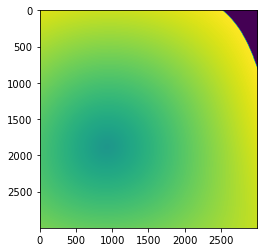

In [22]:
plt.imshow(sun_zh_map)

81.25709


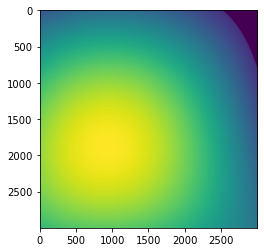

In [36]:
print(sun_zh_map[0,0])
rad=np.radians(sun_zh_map)
adjust=np.cos(rad)
plt.imshow(np.cos(rad))

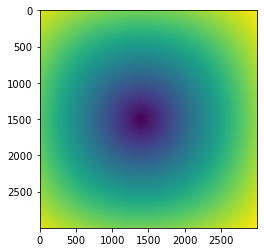

In [11]:
plt.imshow(sat_zh_map)

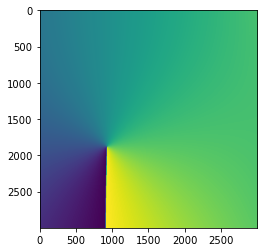

In [12]:
plt.imshow(sun_az_map)

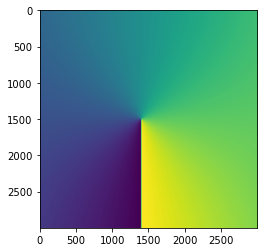

In [13]:
plt.imshow(sat_az_map)
#print(sun_az_map-sat_az_map)

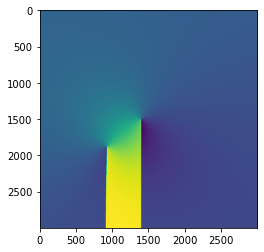

In [15]:
plt.imshow(sun_az_map-sat_az_map)

In [37]:
fin_sun_az_map= cv2.resize(np.single(sun_az_map), (24000, 24000), interpolation=cv2.INTER_LINEAR)
r_map = fin_sun_az_map[::-1]
local_sun_az_map=r_map[16200:17200,6700:8700]
del fin_sun_az_map,r_map
fin_sun_zh_map= cv2.resize(np.single(sun_zh_map), (24000, 24000), interpolation=cv2.INTER_LINEAR)
r_map = fin_sun_zh_map[::-1]
local_sun_zh_map=r_map[16200:17200,6700:8700]
del fin_sun_zh_map,r_map
fin_sat_az_map= cv2.resize(np.single(sat_az_map), (24000, 24000), interpolation=cv2.INTER_LINEAR)
r_map = fin_sat_az_map[::-1]
local_sat_az_map=r_map[16200:17200,6700:8700]
del fin_sat_az_map,r_map
fin_sat_zh_map= cv2.resize(np.single(sat_zh_map), (24000, 24000), interpolation=cv2.INTER_LINEAR)
r_map = fin_sat_zh_map[::-1]
local_sat_zh_map=r_map[16200:17200,6700:8700]
del fin_sat_zh_map,r_map

In [38]:
del sun_az_map,sun_zh_map,sat_az_map,sat_zh_map

In [39]:
local_sun_sat_diff=local_sun_az_map-local_sat_az_map

In [66]:
local_rad=np.radians(local_sun_zh_map)
local_adjust=np.cos(local_rad)
print(np.max(local_adjust))
print(np.min(local_adjust))

0.80718446
0.748724


In [41]:
hima = Rayleigh('Himawari-8', 'ahi')

a=hima.get_effective_wavelength('ch1')
b=hima.get_effective_wavelength('ch2')
c=hima.get_effective_wavelength('ch3')
print(a,b,c)


0.46933338 0.50919455 0.6353782


In [85]:
refl_cor_band1 = hima.get_reflectance(local_sun_zh_map, local_sat_zh_map, local_sun_sat_diff, 'ch1',band033)
refl_cor_band2 = hima.get_reflectance(local_sun_zh_map, local_sat_zh_map, local_sun_sat_diff, 'ch2',band033)
refl_cor_band3 = hima.get_reflectance(local_sun_zh_map, local_sat_zh_map, local_sun_sat_diff, 'ch3',band033)

In [73]:
print(np.max(refl_cor_band1))
print(np.max(refl_cor_band2))
print(np.max(refl_cor_band3))

11.729546263113424
8.705534133580509
4.158297103187608


In [43]:
fileband=glob.glob('test_band01_202002080400.pkl')
        #print(fileband)
with open(fileband[0], 'rb') as f:
    band01= pickle.load(f)
fileband=glob.glob('test_band02_202002080400.pkl')
        #print(fileband)
with open(fileband[0], 'rb') as f:
    band02= pickle.load(f)
fileband=glob.glob('test_band03_202002080400.pkl')
        #print(fileband)
with open(fileband[0], 'rb') as f:
    band03= pickle.load(f)
fileband=glob.glob('test_band04_202002080400.pkl')
        #print(fileband)
with open(fileband[0], 'rb') as f:
    band04= pickle.load(f)

In [82]:
band011= cv2.resize(band01, (2000, 1000), interpolation=cv2.INTER_CUBIC)
band022 = cv2.resize(band02, (2000, 1000), interpolation=cv2.INTER_CUBIC)
band033= band03
band044 = cv2.resize(band04, (2000, 1000), interpolation=cv2.INTER_CUBIC)

In [83]:
print(np.max(band011))
print(np.max(band022))
print(np.max(band033))

86.82083
86.433266
94.29412


In [84]:
band011=band011/local_adjust
band022=band022/local_adjust
band033=band033/local_adjust
band044=band044/local_adjust
band011[band011>100]=100
band022[band022>100]=100
band033[band033>100]=100
band044[band044>100]=100

In [86]:
print(np.max(band011))
print(np.max(band022))
print(np.max(band033))
cor_bandgreen=0.93*(band022-refl_cor_band2)+0.07*band044
cor_bandgreen[cor_bandgreen<0]=0
cor_band011=band011-refl_cor_band1
cor_band033=band033-refl_cor_band3
cor_band011[cor_band011<0]=0
cor_band033[cor_band033<0]=0

100.0
100.0
100.0


In [235]:
#cor_bandgreen=0.93*(band022/(abs(refl_cor_band2-100)/100))+0.07*band044
#cor_bandgreen[cor_bandgreen<0]=0
#cor_band011=band011/(abs(refl_cor_band1-100)/100)
#cor_band033=band033/(abs(refl_cor_band3-100)/100)
#cor_band011[cor_band011<0]=0
#cor_band033[cor_band033<0]=0

In [87]:
rgb01 = (cor_band011/100)**(1/2)
rgb02 = (cor_bandgreen/100)**(1/2)
rgb03 = (cor_band033/100)**(1/2)

In [88]:
print(np.max(rgb01))
print(np.max(rgb02))
print(np.max(rgb03))
print(np.min(rgb01))
print(np.min(rgb02))
print(np.min(rgb03))

1.0
1.0
1.0
0.0
0.0
0.09013138879332129


In [89]:
data = np.array([rgb01,rgb02,rgb03])
aa=np.zeros((1000,2000,3))
aa[:,:,0]=data[2,:,:]
aa[:,:,1]=data[1,:,:]
aa[:,:,2]=data[0,:,:]

mesh=aa[:,:-1,:]
color_t=mesh.reshape((mesh.shape[0] * mesh.shape[1]),3)
color_t[color_t>1]=1
# colorTuple = np.insert(colorTuple,3,1.0,axis=1)
print(aa.shape)
print(color_t.shape)

(1000, 2000, 3)
(1999000, 3)


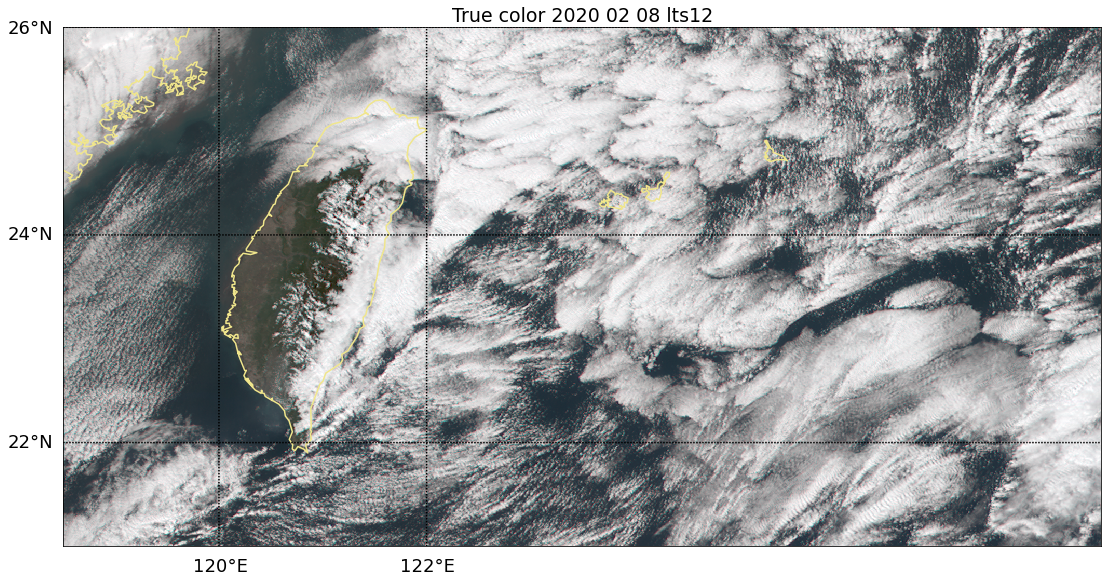

In [90]:
fig = plt.figure(figsize=(16,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=128.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.5,color='khaki')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

cmap2 = cm.get_cmap("gray",lut=10)
cmap2.set_under("k")
cmap2.set_over("w")
#plt.imshow(aa)
#m.pcolormesh(local_lon,local_lat,refl_cor_band1,vmin=8,vmax=12)
m.pcolormesh(local_lon,local_lat,aa[:,:,0],color=color_t)
plt.tight_layout()
plt.title('True color 2020 02 08 lts12',fontsize=19)
plt.savefig('test_true_202002081200_RC_hybridgreen_gamma_zhadjust.png',dpi=300)

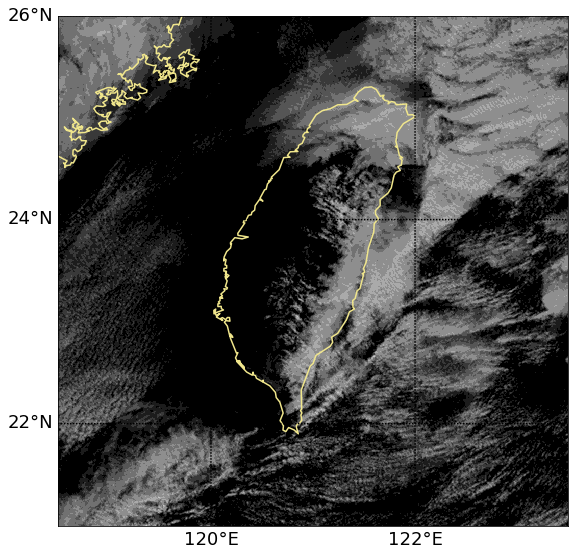

In [197]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.5,color='khaki')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

cmap2 = cm.get_cmap("gray",lut=10)
cmap2.set_under("k")
cmap2.set_over("w")
#plt.imshow(aa)
#m.pcolormesh(local_lon,local_lat,refl_cor_band1,vmin=8,vmax=12)
m.pcolormesh(local_lon,local_lat,cor_band011,cmap=cmap2,vmin=0,vmax=100)
plt.tight_layout()

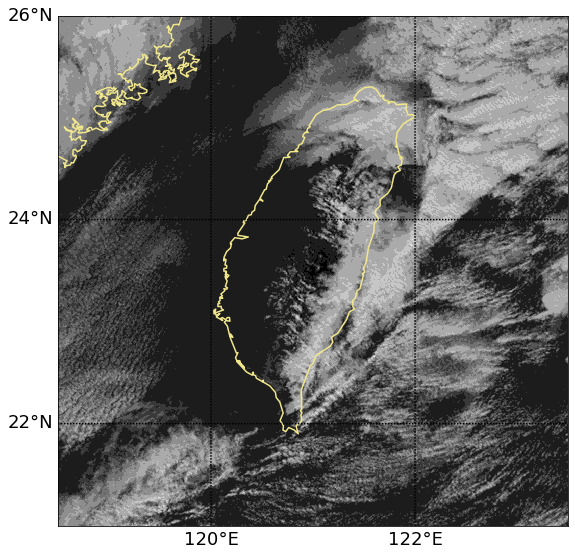

In [196]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.5,color='khaki')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

cmap2 = cm.get_cmap("gray",lut=10)
cmap2.set_under("k")
cmap2.set_over("w")
#plt.imshow(aa)
#m.pcolormesh(local_lon,local_lat,refl_cor_band1,vmin=8,vmax=12)
m.pcolormesh(local_lon,local_lat,band011,cmap=cmap2,vmin=0,vmax=100)
plt.tight_layout()